In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [25]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes['data']
y = diabetes['target']

#print and assign feature names 
feature_names = diabetes.feature_names

X_df = pd.DataFrame(X, columns=feature_names)
y_df = pd.DataFrame(y, columns=['target'])

print(X_df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [27]:
#One Hot Encoding
from sklearn import preprocessing
nominal_column = ['sex']
enc = preprocessing.OneHotEncoder(categories='auto')
df_hd_named_enc = pd.DataFrame(enc.fit_transform(
    X_df[nominal_column]).toarray())
df_hd_named_enc.columns = enc.get_feature_names_out(nominal_column)
df_ohe = pd.concat([X_df, df_hd_named_enc], axis=1)

df_ohe.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sex_-0.044641636506989144,sex_0.05068011873981862
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,0.0,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,1.0,0.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0.0,1.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1.0,0.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,1.0,0.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,1.0,0.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,0.0,1.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,0.0,1.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,0.0,1.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,1.0,0.0


In [28]:
#split 80/20
X_train, X_test, y_train, y_test = train_test_split(df_ohe, y, test_size=0.2, random_state=42, shuffle=True)


In [ ]:
#hyperparameter tuning
param_grid = [
    {'kernel': ['linear', 'rbf', 'sigmoid']}, 
    {'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5]}  # Degree of polynomial kernel
]
#GridSearchCV 
gs = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs.fit(X_train, y_train)
#results
print( gs.best_params_)
print("Best CV MSE:", -gs.best_score_) 


{'degree': 5, 'kernel': 'poly'}
Best CV MSE: 5915.28637270637


In [35]:

from sklearn.metrics import mean_squared_error

# Use the best parameters from GridSearchCV
svm_model = SVR(kernel='poly', degree=5)  # Use best kernel and degree

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)



In [38]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (89,)
Shape of y_pred: (89,)


In [39]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")

Test MSE: 4963.38
Test MAE: 60.63


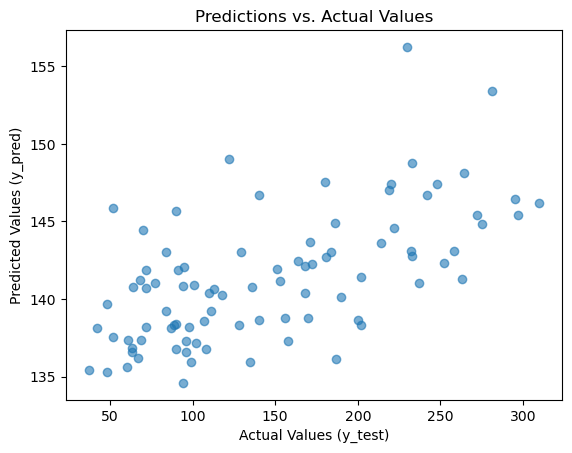

In [40]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Predictions vs. Actual Values")
plt.show()